In [2]:
from PIL import Image
import cv2 
import numpy as np
from pathlib import Path
import os, shutil
from os import listdir
import pickle
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import librosa
import librosa.display
import pickle
import pandas as pd
from pandas import Series, DataFrame

In [3]:
images_dir_true = Path(r"C:\Users\g_bab\Downloads\dataCLASSES_wo_rocket_body").expanduser()
labels_imgs = []
count = 0
for z in range(len(listdir(images_dir_true))):
    im = np.load(os.path.join(images_dir_true, "real_set"+str(z+1)+".npy"))
    labels_imgs.append(im)

In [31]:
img_data = [i for i in range(len(labels_imgs))]     
print(len(img_data))
onehotslist = []
for label in img_data:
    blank = np.zeros(len(img_data))
    blank[label] = 1
    onehotslist.append(blank)
#print(onehotslist)
onehots_dict = {img_data[i]:onehotslist[i] for i in range(len(img_data))}
#print(onehots_dict)

126


In [8]:
images_dir = Path(r"C:\Users\g_bab\Downloads\data_wo_rocket_body").expanduser()

xtest_data = []
count = 0
for k in range(len(listdir(images_dir))):
    im = np.load(os.path.join(images_dir, "train_set"+str(k+1)+".npy"))
    xtest_data.append(im)


In [9]:
for i in xtest_data:
    if i.shape != (100,100,3):
        print("wrong shape")

126


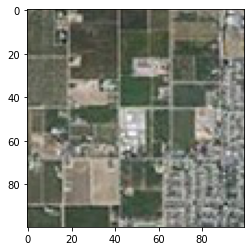

In [10]:
fig, ax = plt.subplots()
count=0 
for i in range(len(labels_imgs)):
    ax.imshow(labels_imgs[i])
    count+=1
print(count)

In [32]:
keypointslist = []       #will have number of classes number of keypoints
descriptorslist = []     #will have number of classes number of descriptor vectors   <-- important thing

sift = cv2.xfeatures2d.SIFT_create()

for i in labels_imgs:
    #img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)    might uncomment later

    #sift = cv2.xfeatures2d.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(i,None)
    
    keypointslist.append(keypoints)
    descriptorslist.append(descriptors)
    #print(len(keypoints))
    

In [29]:
len(xtest_data)

12600

In [33]:
#test with all our distorted images and see how many guesses come back right
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
acc_count = 0
killed_imgs = 0

for i in range(len(xtest_data)-10000):  #for each test image
    
    test_keypoints, test_descriptors = sift.detectAndCompute(xtest_data[i],None)      #calculate descriptor of that image
    matches_counts = []
    if test_descriptors is None:
        print("no descriptor")
        killed_imgs+=1
        continue
    for j in descriptorslist:                      #compare that discriptor with every descriptor of the 126 classifying images
        matches = bf.match(j,test_descriptors)       
        matches_counts.append(len(matches))        
        
    guess = np.argmax(matches_counts)              #return which classifying image most matched the test image
    
    if np.argmax(onehots_dict[i%len(labels_imgs)]) == guess:      #if the guess is the same as the label, mark as correct
        acc_count+=1
        

KeyboardInterrupt: 

In [36]:
final_accuracy = acc_count/(len(xtest_data)-killed_imgs)
print(final_accuracy)  #around 20% accuracy

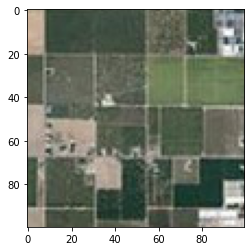

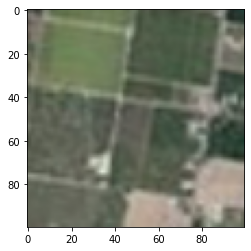

In [24]:
#use this to check that its actually looking for the right stuff
check_number = 123

test_keypoints, test_descriptors = sift.detectAndCompute(xtest_data[check_number],None)
descriptorslist[check_number]

fig, ax = plt.subplots()
ax.imshow(labels_imgs[check_number])
fig, ax = plt.subplots()
ax.imshow(xtest_data[check_number])



In [25]:
matches = bf.match(descriptorslist[check_number],test_descriptors)

img3 = cv2.drawMatches(labels_imgs[check_number], keypointslist[check_number], xtest_data[check_number], test_keypoints, matches, xtest_data[check_number], flags=2)


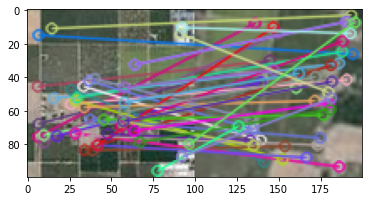

In [26]:
fig, ax = plt.subplots()
ax.imshow(img3)